<div style="background-color: lightgreen; padding: 18px;">
    <h1> Aula 5| Estatística I
</div>

<div style="background-color: lightblue; padding: 10px;">
    <h2> Tópicos da aula 5
</div>

- Amostragem


#### Amostragem

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
#sns.set()

<img src='https://miro.medium.com/max/625/1*ZhYNqU2y96_f3QkWq9oiWQ.jpeg'>

## 1. Introdução

Quando se prepara um macarrão, uma unidade desse é retirada para saber se o ponto de cozimento é o desejado.

Pra saber se uma sopa está corretamente salgada, experimentamos uma única colherada.

Quando um médico deseja identificar se um paciente está doente, alguns ml de sangue são retirados para análise. 

Em todos os casos acima, não seria conveniente analisar o todo, para chegar a uma conclusão satisfatória. De fato, o que fazemos é **tirar uma parte do todo** para validar alguma suposição.

Este procedimento é chamado de **amostragem**, e tem como objetivo **obter informações, tirar conclusões sobre o todo** com base na **análise de dados coletados de parte do todo (amostra)**.

A **inferência estatística** é a área que define:

- Como coletar as amostras do todo a serem analisadas;
- Como, e com que confiança, podemos generalizar as conclusões para o todo.

## 1.1.Definições

**População** ou **Universo**: é o conjunto de todas as unidades elementares de interesse: o todo. A população sempre deve ser definida claramente e em termos da informação que se pretende conhecer;

**Unidade**: trata-se de qualquer elemento da população;

**Amostra**: uma parte ou subconjunto da população;

**Censo**: observação de todos os elementos da população;

**Parâmetro Populacional**: é o vetor correspondente a todos os valores de uma variável de interesse. Pode ser qualitativa (gosto musical, opinião sobre o governo, etc) ou quantitativa (média, proporção, quantidade, etc).

Todas as informações obtidas através de dados amostrais, ou seja, que não abrangem o todo da população de interesse, são baseadas em estimativas.

**Estimadores pontuais**: são valores que **estimam** os parâmetros populacionais, calculados com base em uma amostra.
<br>

- Exemplos de parâmetros populacionais: 
    - média: $\mu$
    - diferença de médias: $\mu_1 - \mu_2$
    - proporção: $p$
    - desvio padrão: $\sigma$
    
- Exemplos de estimadores de ponto: 
    - média: $\bar{x}$
    - diferença de médias: $\bar{x}_1 - \bar{x}_2$
    - proporção: $\hat{p}$
    - desvio padrão amostral: $\hat{s}$
    
 
    
### 1.2 Propriedade dos estimadores
 - Não viesado (não tendencioso): $E(\hat{\beta}) = \beta$
 - Eficiente:  dentre os estimadores não-viesados, escolher o de menor variância
 - Consistente: $ lim_{n \to \infty} P(|\hat{\beta}-\beta| > \epsilon) = 0$ (quanto maior a amostra, mais perto a estimativa estará do parâmetro populacional). Em outras "palavras": 
 
 $ lim_{n \to \infty} E(\hat{\beta}) \to \beta$     e     $ lim_{n \to \infty} Var(\hat{\beta}) \to 0$
 
 
 
 

 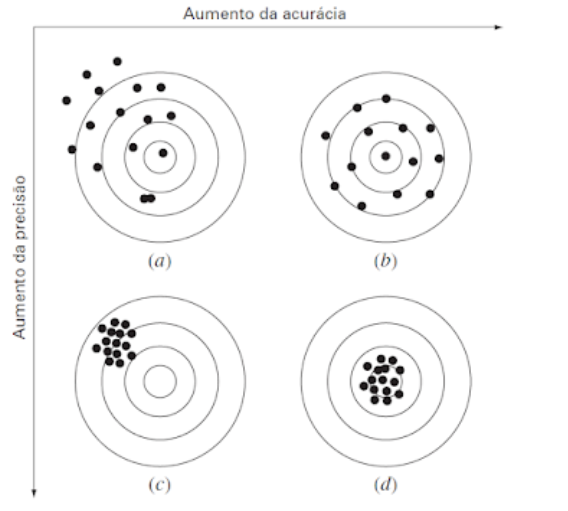
 

Demonstração do uso do n-1 no lugar do n, na variância amostral:
https://www.inf.ufsc.br/~andre.zibetti/probabilidade/distribuicao_amostral_variancia.html

Sobre a distribuição da média amostral (necessário para entender a variância da média amostral utilizada acima):
https://www.inf.ufsc.br/~andre.zibetti/probabilidade/distribuicao_amostral_variancia.html

## 2.Tipos  de Amostragem

- **Amostra probabilística**: todos os elementos da população apresentam probabilidade maior que zero de serem selecionados. (aleatória simples, estratificada, sistemática e por conglomerados)


- **Amostra não probabilística**: quando não há probabilidade clara/conhecida de seleção dos elementos. Os elementos são escolhidos de forma julgamental. (acidental, intencional, por cotas)

Aqui, abordaremos apenas os métodos relacionados à **amostragem probabilística**, com o objetivo de obter uma **amostra representativa**. 

Uma amostra é considerada representativa quando consegue **refletir as características da população**.

Vamos ver os principais **métodos de amostragem**:    

### 2.1. Amostra Aleatória Simples

<font color='blue'> "Dá a mesma chance a todos os membros de uma população de ser selecionado, além de utilizar alguns mecanismos de causalidade para escolhê-los"</font>


Este é o método mais simples e mais importante de seleção de uma amostra, pois pode ser usada em combinação com outros métodos. A premissa assumida é que a população é homogênea com relação à característica de interesse.

A amostra aleatória simples pode ser realizada com ou sem reposição. No caso em que há reposição, cada elemento pode ser sorteado mais de uma vez. Para exemplificar, suponha que se queira sortear um número aleatório de uma urna, se for uma Amostra Aleatória Simples com reposição,  este número voltará para urna para participar do próximo sorteio. Se não houver reposição, cada elemento só poderá ser selecionado uma vez para compor a amostra.
 
Considere uma população formada por $N$ elementos (conhecido e finito). Este método consiste em selecionar $n$ elementos, sendo que cada elemento tem a mesma probabilidade de ser selecionado.

<img src="http://khsapstats.weebly.com/uploads/3/8/5/3/3853479/6057546.gif?242" width=400>

**Exemplo**: Considere uma população formada por 20 alunos. Selecionar de forma aleatória 5 alunos, **sem reposição**:

In [2]:
alunos = list(range(1, 21))
print(alunos)
random.sample(alunos, k=3)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


[12, 11, 4]

In [3]:
from numpy.random import choice

np.random.seed(42) #permitir a reprodutibilidade

choice(alunos, size=10, replace=True)

array([ 7, 20, 15, 11,  8,  7, 19, 11, 11,  4])

In [4]:
choice(alunos, size=10, replace=True)

array([ 8,  3,  2, 12,  6,  2,  1, 12, 12, 17])

In [5]:
# Com um dataset

In [6]:
dados = pd.read_csv('PNAD - 2015.csv',sep=',')
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [57]:
# Média da amostra de tamanho 5
dados.sample(5)['Idade'].mean()

40.2

In [8]:
dados.Idade.describe()

count    76840.000000
mean        44.071421
std         12.480583
min         13.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         99.000000
Name: Idade, dtype: float64

### 2.2. Amostra Sistemática

<font color='blue'> "Os elementos são selecionados seguindo uma regra pré definida"</font>

Usada quando os elementos população estão ordenados (população de lista telefônica, casas em uma rua). 

Considere uma população de tamanho $N$ e que se queira uma amostra de tamanho $n$. O processo de amostragem deste método consiste em:

- Dividir o tamanho populacional em $K$ partes:
$$ k = \frac{N}{n} $$

- Definir a posição de início da amostragem (que também será o primeiro elemento da amostra). Para tal fim, é sorteado $i$ com o uso da amostra aleatória simples no intervalo, em que  $i \in [1, k]$


- A partir do elemento selecionado aleatoriamente, é realizada sucessão aritimética para selecionar os $n-1$ indivíduos restantes
$$i, i + k, i + 2k, i + 3k, ...., i + (n-1)k$$

<img src="http://faculty.elgin.edu/dkernler/statistics/ch01/images/sys-sample1.gif" width=400>

Exemplo de algoritmo para amostragem sistemática no exemplo de 20 alunos

20 elementos na população  
5 elementos da amostra

passo = 20 / 5 = 4

In [9]:
alunos

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [10]:
# Observação quanto aos extremos (range)
from random import randint

randint(1, 10)

6

In [11]:
def amostragem_sistematica(populacao, n):
    N = len(populacao)
    step = N // n # k escolha de 4 em 4 pq temos 20 amostras e quero 5 elementos
    initial_index = randint(0, step - 1) # índice inicial
    
    amostras = []
    
    for i in range(initial_index, N, step):
        amostras.append(populacao[i])
    
    return amostras

amostragem_sistematica(alunos, 5)

[4, 8, 12, 16, 20]

### 2.3.Amostra Estratificada

<font color='blue'> A população é dividida em estratos homogêneos (grupos com elementos de características comuns) e é selecionada uma amostra aleatória de cada estrato. </font>
    
Trata-se do método em que a população é dividida em grupos (estratos) segundo alguma(s) característica(s) conhecida(s) na população sob estudo. 

São exemplos de estrato: gênero, faixa etária, região geográfica, profissão, etc. 

No geral, é usada quanto a população é heterogênea sob a ótica das características analisadas. 

Procedimento de amostragem:

- Dividir as $N$ unidades da população em $N_1, N_2, \cdots , N_j$ estratos distintos e homogêneos


- Selecionar, ao acaso, uma amostra de tamanhos $n_1, n_2, \cdots , n_j$ , de modo que o tamanho da amostra seja $n = n_1+n_2+ \cdots +n_j$. O tamanho amostral pode ser proporcional à representatividade do estrato


**Exemplo**: Considere a população formada pelos integrantes de uma escola. Dependendo do objetivo do estudo, esta população poderia ser dividida em alunos, professores, e demais funcionários (grupos mais homogêneos com relação à função na escola). 

Agora considere que a proporção de cada estrato seja: 50% alunos, 25% professores e 25% servidores. A amostragem poderia ser realizada dentro de cada estrato de forma que o tamanho amostral preserve esta característica. Sendo assim, se amostra total é $n$, a composição será $0,5 \times n$ de alunos, $0,25\times n$ de professores e $0,25\times n$ de servidores.

<img src="https://faculty.elgin.edu/dkernler/statistics/ch01/images/strata-sample.gif" width=400>

In [12]:
tamanho_amostra = 50

print("Tamanho da amostra de professores:", 0.25 * tamanho_amostra)
print("Tamanho da amostra de alunos:", 0.5 * tamanho_amostra)
print("Tamanho da amostra de servidores:", 0.25 * tamanho_amostra)

Tamanho da amostra de professores: 12.5
Tamanho da amostra de alunos: 25.0
Tamanho da amostra de servidores: 12.5


### 2.4. Amostra por conglomerados

<font color='blue'> A população (extensa) é dividia em miniaturas da população (não homgêneas) e seleciona-se uma amostra aleatória desses conglomerados </font>

A população é dividida em subpopulações (conglomerados) heterogêneas distintas (quarteirões, residências, famílias, bairros, etc.). Alguns dos conglomerados são selecionados segundo amostra aleatória simples e **todos os elementos** nos conglomerados selecionados são observados. Note que amostragem é feita sobre os conglomerados, e não mais sobre os indivíduos da população. Este procedimento amostral é adequado quando é possível dividir a população em um grande número de pequenas subpopulações.

Geralmente este método é usado quando os sistemas de referência da população não são adequados e o custo para atualização é alto, ou quando identificar os elementos da população em campo é cara e consome muito tempo.

<img src='http://khsapstats.weebly.com/uploads/3/8/5/3/3853479/4206002.gif' width=400>

**Exemplo**: Suponha que o objetivo de uma pesquisa seja determinar a renda média familiar de moradores de uma cidade. Dificilmente dispõe-se de uma lista de famílias, a unidade elementar da população de interesse. Pode-se usar como sistema de referência a lista de setores censitários do IBGE. Neste caso, os setores censitários seriam os conglomerados.

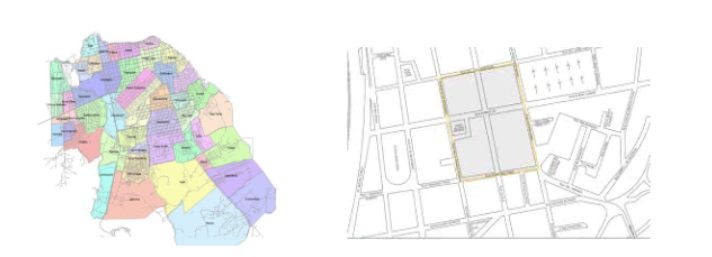

Então sabemos como coletar os dados. Agora vamos ver como analisar/estimar os dados da população de acordo com a amostra. INFERÊNCIA.

Abaixo, uma tabela de estimadores

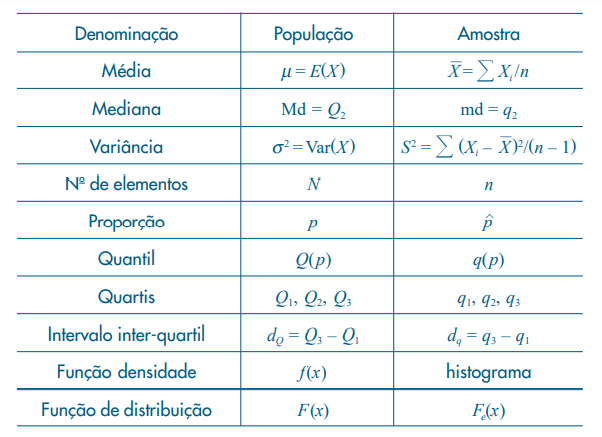

Estimação de parâmetros: A estimação é o processo que consiste no uso de
dados da amostra (dados amostrais) para estimar valores de parâmetros
populacionais desconhecidos, tais como média, desvio padrão, proporções,
etc.

Estimador: é uma função dos elementos da amostra, que será usada no
processo de estimação do parâmetro desejado. O estimador é, como vemos,
uma estatística. Será, portanto, uma variável aleatória caracterizada por uma
distribuição de probabilidade e seus respectivos parâmetros próprios.

O estimador é uma variável aleatória com uma distribuição de probabilidade

## 3. Tamanho Amostral

Ao extrair uma amostra para inferir algo sobre a população, sempre há um erro associado ao **planejamento amostral**. 

A medida que o **tamanho da amostra aumenta**, o **erro do estimador diminui**

Vale ressaltar que uma amostra muito grande pode implicar em custos desnecessários, enquanto que uma amostra pequena pode tornar a pesquisa inconclusiva. 

Deste modo, o ponto chave de um levantamento amostral é determinar **o tamanho adequado da amostra** para que **os estimadores pontuais** sejam **estimados com confiança**!

Ou seja, queremos responder à pergunta:

> O quão confiantes estamos com relação aos estimadores pontuais que calcularmos com base em uma amostra?

Ou seja,

- A partir de $\bar{x}$, o que eu posso **inferir** sobre $\mu$?

- Ou, a partir de $\hat{p}$, o que eu posso **inferir** sobre $p$?

Para responder a estas perguntas, vamos introduzir uma das ideias mais poderosas da estatística: o **teorema do limite central** e voltaremos para calcular o tamanho da amostra

**Exemplo**: Considere o exemplo em que se queira estimar a média da variável "Petal length" (base iris). O gráfico mostra que a relação entre tamanho da amostra e erro amostral não é linear, corroborando o que será discutido nesta seção.

In [13]:
idades = [31, 27, 30, 28, 28, 54, 42, 32, 31, 27, 27, 30, 23, 26, 41, 37]
choice(idades, size=9, replace=False).mean()


32.0

In [59]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
df.shape

(150, 5)

In [61]:
pop_mean = df['petal_length'].mean()
pop_mean

3.7580000000000005

In [62]:
df.sample(n=50)['petal_length'].mean()

3.5900000000000007

In [63]:
df_samples = pd.DataFrame(columns=['n', 'erro'])

for tamanho_amostra in range(2, df.shape[0] + 1):
    petal_length_amostra = df['petal_length'].sample(n=tamanho_amostra, random_state=101)
    
    sample_mean = petal_length_amostra.mean()
    erro = abs(pop_mean - sample_mean)
    
    # lista.append([tamanho_amostra, erro])
    
    
    df_samples = pd.concat([df_samples, pd.DataFrame({ 'n': [tamanho_amostra], 'erro': [erro] })] )
    
    

C:\Users\User\AppData\Local\Temp\ipykernel_27528\4194867348.py:12: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [64]:
df_samples.index = (list(range((df_samples.shape[0]))))

df_samples

,n,erro
0,2,2.408000e+00
1,3,2.324667e+00
2,4,1.233000e+00
3,5,7.980000e-01
4,6,4.746667e-01
...,...,...
144,146,5.013699e-03
145,147,1.206803e-02
146,148,1.159459e-02
147,149,2.966443e-03


In [20]:
!pip install plotly

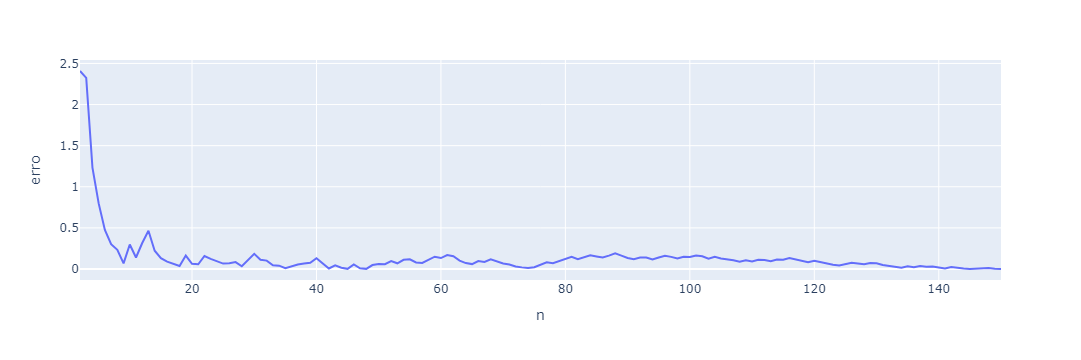

In [65]:
import plotly.express as px
import plotly.io as pio

#pio.templates.default = 'plotly_white'

px.line(df_samples, x='n', y='erro')


## 4 - Teorema do Limite Central (TLC, ou TCL)

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**. 

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal. 

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, e depois veremos alguns exemplos:

> Seja uma **amostra aleatória** ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. Para $n$ suficientemente grande ($n \ge 30$), a **distribuição das médias amostrais**, $\overline{X}$, se **aproxima de uma distribuição normal** com média $\mu_{\overline{x}} = \mu$ e erro padrão $SE_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$. Isto é, $$\overline{X} \sim N \left(\mu, \frac{\sigma}{\sqrt{n}} \right)$$
OBS.: quando estamos falando do **estimador amostral do desvio padrão**, costumamos usar o termo **erro padrão** (standard error), denotado $SE$.

O que o TLC para as médias diz, essencialmente, é:

> A distribuição de **médias das amostras** tiradas de **qualquer distribuição populacional** será **aproximadamente normal**, contanto que fizermos uma quantidade razoável de amostras com tamanho amostral $n>30$.

E isso é um resultado fantástico, pois nos permite a construção de uma **distribuição normal**, para a qual vale uma série de resultados e teoremas, a partir de **qualquer distribuição populacional**!

Uma outras palavras, também podemos definir:

Seja uma amostra aleatória ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. A medida que $n$ cresce, a distribuição de probabilidade da média amostral, $\overline{X}$, se aproxima de uma Normal com média $\mu$ e desvio padrão $\frac{\sigma}{\sqrt{n}}$. Isto é $\overline{X} \sim N (\mu, \sigma^2/n)$. Se a transformação a baixo for realizada, então $Z \sim N (0,1)$.

$$Z = \frac{\overline{X} -\mu}{\sigma/\sqrt{n}} $$


$$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

Conforme o tamanho da amostra cresce, o erro padrão diminu. O relacionamento entre o erro-padrão e o tamanho da amostra às vezes é chamado de regra da raiz quadrada de n: a fim de reduzir o erro-padrão em um fator de 2, o tamanho da amostra deve
ser elevado em um fator de 4.

Na prática, essa abordagem de coletar novas amostras para estimar o erro padrão não costuma ser viável (além de ser um desperdício estatístico).
Felizmente, acontece que não é necessário extrair novas amostras. Em vez disso, você pode usar reamostras *bootstrap*. Na
estatística moderna, o bootstrap se tornou o modo padrão de estimar o erropadrão. Pode ser usado para praticamente qualquer estatística e não se baseia no teorema de limite central ou outras suposições distribucionais.


#### Bootstrap

Um jeito fácil e eficaz de estimar a distribuição amostral de uma estatística ou de parâmetros de modelo é extrair amostras adicionais, com reposição, da própria amostra, e recalcular a estatística ou modelo para cada reamostra.
Esse procedimento é chamado de bootstrap e não envolve necessariamente quaisquer suposições sobre os dados ou a estatística amostral sendo normalmente distribuída.

> - Amostra bootstrap: Uma amostra extraída com reposição de um conjunto de dados observado.
> - Reamostragem: O processo de extrair repetidas amostras dos dados observados. Inclui ambos os procedimentos, de bootstrap e permutação (embaralhamento).

Conceitualmente, pode-se imaginar o bootstrap como a replicação da amostra
original milhares ou milhões de vezes, de modo a ter uma população
hipotética que representa todo o conhecimento da amostra original (só que
maior). Pode-se então extrair amostras dessa população hipotética a fim de
estimar uma distribuição amostral. 

<img src='https://miro.medium.com/max/1400/1*cmA1PPO4Us6_okb5UMhb0Q.jpeg'>

- O bootstrap (amostragem com reposição de um conjunto de dados) é uma ferramenta poderosa para avaliar a variabilidade de uma estatística amostral.
- O bootstrap pode ser aplicado de forma similar em uma grande variedade de circunstâncias, sem maiores estudos de aproximações matemáticas para distribuições de amostragem.
- Nos permite também estimar distribuições de amostragem para estatísticas em que nenhuma aproximação matemática foi desenvolvida.
- Quando aplicado a modelos preditivos, agregando múltiplas previsões de amostra, o bootstrap (bagging) supera o uso de um único modelo

Vamos entender como funicona a TLC

In [22]:
# PNAD - Pesquisa Nacional por Amostra de Domicílios

df = pd.read_csv('PNAD - 2015.csv', sep=',')

In [23]:
df.shape

(76840, 7)

<Axes: xlabel='Idade', ylabel='Count'>

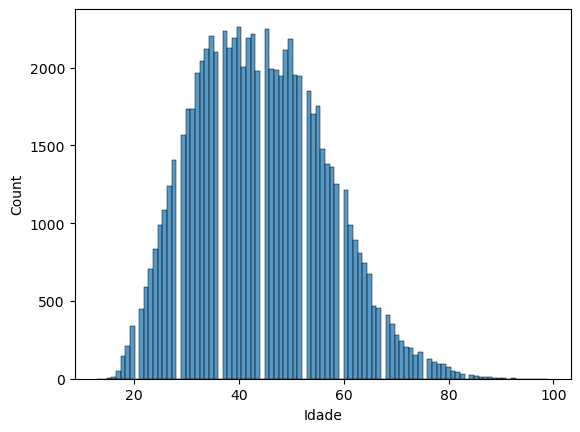

In [24]:
sns.histplot(df['Idade'])

In [25]:
#sns.histplot(df['Renda'])

> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [26]:
df['Idade'].sample(5)

73458    50
65344    32
67792    53
64163    57
58126    50
Name: Idade, dtype: int64

In [27]:
# Média populacional
df['Idade'].mean()

44.07142113482561

In [28]:
n = 1600 #(tamanho da amostra)
numero_de_amostras = 3000 #(número de amostras)
amostra = []

for i in range(numero_de_amostras):
    amostra.append(df['Idade'].sample(n).reset_index(drop=True))

amostras = pd.concat(amostra, axis=1)
amostras.columns = ['Amostra'+str(i+1) for i in range(numero_de_amostras)]

In [29]:
amostras

,Amostra1,Amostra2,Amostra3,Amostra4,Amostra5,Amostra6,Amostra7,Amostra8,Amostra9,Amostra10,...,Amostra2991,Amostra2992,Amostra2993,Amostra2994,Amostra2995,Amostra2996,Amostra2997,Amostra2998,Amostra2999,Amostra3000
0,75,23,36,51,34,26,43,75,33,36,...,45,41,39,48,65,48,43,22,39,42
1,56,39,51,41,38,30,58,55,42,66,...,38,60,65,48,73,38,27,57,54,43
2,44,45,39,45,36,61,39,37,37,52,...,51,23,50,31,56,42,51,25,29,41
3,21,35,27,71,53,61,24,62,31,62,...,36,42,46,33,46,33,44,43,30,34
4,52,31,45,40,50,51,22,61,41,55,...,57,39,29,30,31,32,30,66,66,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,56,42,47,20,54,27,49,22,50,30,...,30,38,68,56,42,44,21,32,36,34
1596,51,60,35,21,54,34,34,38,68,73,...,36,45,38,44,34,24,21,24,41,71
1597,40,32,40,57,41,41,50,38,53,48,...,52,55,46,49,41,58,48,56,42,62
1598,42,24,38,45,45,55,47,26,41,25,...,58,34,33,50,33,58,47,64,54,64


<Axes: ylabel='Count'>

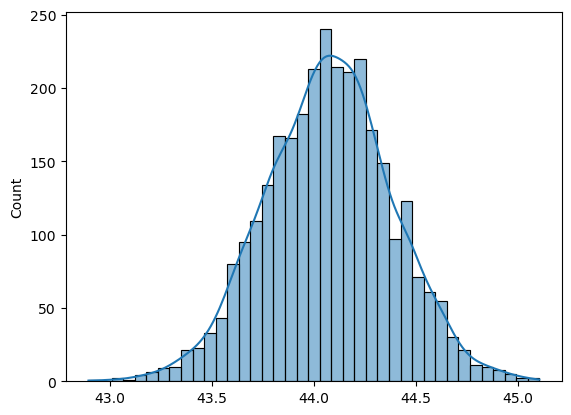

In [30]:
sns.histplot(amostras.mean(), kde=True)

In [31]:
amostras.mean().max(), amostras.mean().min(), amostras.mean().mean(), df.Idade.mean()

(45.10375, 42.895, 44.072454791666665, 44.07142113482561)

In [32]:
# tirando a média de cada coluna, ou seja, média de cada amostra
amostras.mean()

Amostra1       44.203125
Amostra2       44.275000
Amostra3       44.230000
Amostra4       44.101250
Amostra5       43.901250
                 ...    
Amostra2996    44.402500
Amostra2997    43.539375
Amostra2998    43.668125
Amostra2999    44.085000
Amostra3000    44.166875
Length: 3000, dtype: float64

In [33]:
amostras.mean().min(), amostras.mean().max() # menor valor de média de amostra e maior valor de média de amostra

(42.895, 45.10375)

<Axes: ylabel='Count'>

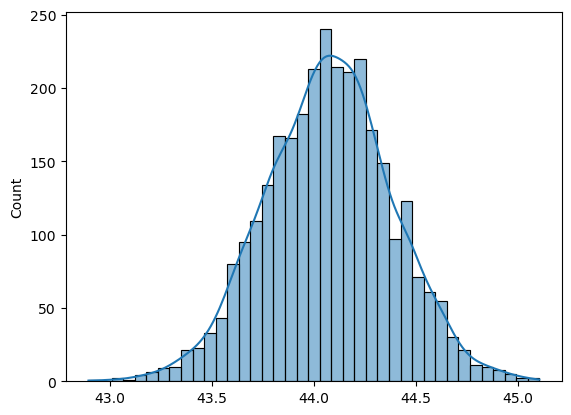

In [34]:
sns.histplot(amostras.mean(), kde=True)

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [35]:
df['Idade'].mean(), amostras.mean().mean()

(44.07142113482561, 44.072454791666665)

In [36]:
df['Idade'].std(), amostras.mean().std()

(12.480583465360187, 0.31034784871653737)

In [37]:
print(amostras.mean().mean()) # média das amostras de idade
amostras.mean().std() # desvio padrão da média das amostras

44.072454791666665


0.31034784871653737

In [38]:
df['Idade'].mean() #média de idade da população

44.07142113482561

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

### $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [39]:
df['Idade'].std() # desvio populacional

12.480583465360187

In [40]:
amostras.mean().std() # desvio padrão das médias amostras
#amostras.mean()

0.31034784871653737

In [41]:
# Usando a fórmula acima e verificando a afirmação do teorema do limite central

df['Idade'].std() / np.sqrt(n), amostras.mean().std()

(0.31201458663400466, 0.31034784871653737)

In [42]:
# Observe que a média e o desvio padrão de cada amostra é parecido com o da população
amostras['Amostra1'].mean(), df.Idade.mean()

(44.203125, 44.07142113482561)

In [43]:
amostras['Amostra1'].std(), df.Idade.std()

(12.53909419720695, 12.480583465360187)

Lembrando do bootstrap

In [44]:
from sklearn.utils import resample # reamostragem

results = []
for nrepeat in range(1000):
    sample = resample(df['Idade'])
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {df["Idade"].median()}')
print(f'bias: {results.median() - df["Idade"].median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 43.0
bias: 0.0
std. error: 0.07882870012859454


A estimativa original mediana é de 43 anos. A distribuição bootstrap incida que a estimativa possui um viés 0,0 ano (sem viés) e um erro-padrão de 0,1 ano

**Gráfico QQ**

Um gráfico para visualizar quão próxima uma distribuição amostral está de uma distribuição
normal.

O gráfico QQ ordena os escores z de
baixos a altos e registra cada valor do escore z no eixo y, e o eixo x é o
quantil correspondente a uma distribuição normal para a posição daquele
valor. Como os dados estão normalizados, as unidades correspondem a um
número de desvios-padrão dos dados da média

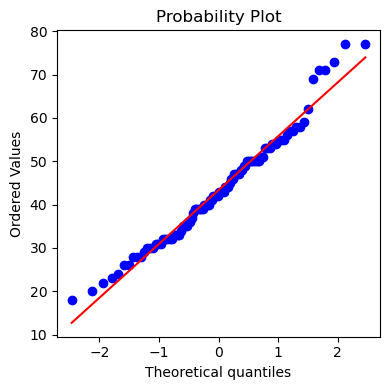

In [45]:
from scipy import stats
fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(df['Idade'].sample(100), plot=ax) #vou aumentando o tamanho da amostra

plt.tight_layout()
plt.show()

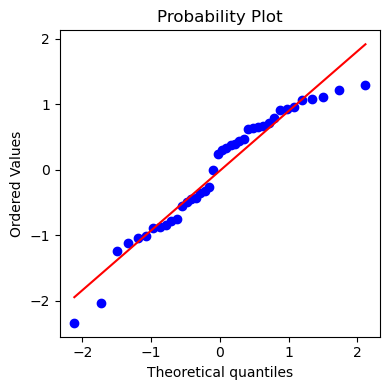

In [46]:
# um exemplo com dados de uma distribuição normal
from scipy import stats
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=40)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

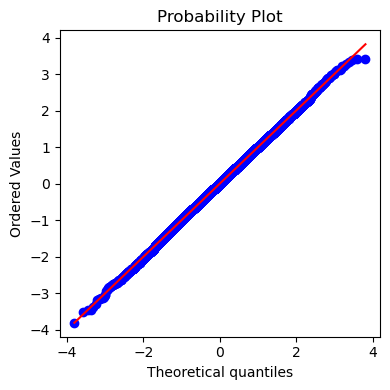

In [47]:
# O que devemos observar nesse gráfico é que quanto maior o tamanho da amostra, mais se aproxima da curva normal

# um exemplo com dados de uma distribuição normal
from scipy import stats
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=10000)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

Tabelas de frequência, histogramas, boxplots e erros-padrão são todos meios
de entender o potencial erro de uma estimativa de amostra. **Intervalos de
confiança** são outro.

**Nível de confiança**:

A porcentagem de intervalos de confiança, construída da mesma forma e de uma mesma
população, em que se espera que haja a estatística de interesse.

**Extremidades de intervalo**:  

O topo e a base do intervalo de confiança

## 5 Níveis de confiança e significância


###  5.1 Definições
O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

Para um cientista de dados, um intervalo de confiança é uma ferramenta para ter uma
ideia de quão variável o resultado da amostra pode ser. Os cientistas de dados não
utilizariam essa informação para publicar um artigo acadêmico ou submeter um resultado
a uma agência regulatória (como um pesquisador poderia fazer), mas provavelmente para
comunicar o potencial erro em uma estimativa e, talvez, entender se uma amostra maior é
necessária.





### 5.2  Erro inferencial
***

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$


#### Tamanho da amostra: 
$$n = (\frac{z \sigma}{e})^2$$ 


### Para populações finitas (de tamanho N)

$$ n = \frac{z^2*N*\sigma^2}{e^2*(N-1) + z^2*\sigma^2}$$

##  Intervalos de confiança
***

### Intervalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

### Exemplo

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatória de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

In [48]:
#Dados do enunciado
sigma = 150
n = 20
x_medio = 5050
alpha = 0.05


In [49]:
#Solução
from scipy.stats import norm
Z = 1.96 #Tabela
#Z = norm.ppf(0.975) #Python
print('Intervalo de confiança:')
print(f'[{x_medio - Z * sigma / (n)**0.5:.2f}  , {x_medio + Z * sigma / (n)**0.5: .2f}]') 

Intervalo de confiança:
[4984.26  ,  5115.74]


$$\mu = \bar{x} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$

$$IC(\mu) = [ \bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, \bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}} ]$$

In [50]:
# Obtenção do valor de z
Z = norm.ppf(0.975)
Z

1.959963984540054

In [51]:
Z = norm.ppf(0.025)
Z

-1.9599639845400545

In [52]:
norm.cdf(0)

0.5

Para calcular o z_alfa_2  ---> precisamos da tabela de z (tabela normal padronizada)

In [53]:
# Outra forma de construir a tabela normal padrão utilizando o norm
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.1f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

In [54]:
tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.1,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.2,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.3,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.4,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.5,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.6,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.7,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.8,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.9,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)